In [73]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.cluster import  DBSCAN
#

In [74]:
raw_data_home=pd.read_csv("DC_Properties.csv",index_col=0,low_memory=False)


In [75]:
raw_data_home

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,1938,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,0477,-77.019422,38.911848,NW
158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,1938,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,0477,-77.019422,38.911848,NW
158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,1920,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,0477,-77.019422,38.911848,NW
158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,1965,...,-77.018230,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,0504,-77.018232,38.872961,SW


In [76]:
m=raw_data_home.isnull().sum(axis=0)
print(m)

BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY                   52906
STATE         

In [98]:
raw_data_home=pd.DataFrame(raw_data_home.loc[:,['BATHRM','HF_BATHRM','HEAT','AC','ROOMS','BEDRM','AYB','EYB','SALEDATE','PRICE','QUALIFIED','SALE_NUM','BLDG_NUM','FIREPLACES','USECODE','LANDAREA','GIS_LAST_MOD_DTTM','SOURCE','ZIPCODE','LATITUDE','LONGITUDE','ASSESSMENT_NBHD','CENSUS_TRACT','WARD','SQUARE','X','Y','QUADRANT']])

In [99]:
m=raw_data_home.isnull().sum(axis=0)
print(m)
raw_data_home

BATHRM                 0
HF_BATHRM              0
HEAT                   0
AC                     0
ROOMS                  0
BEDRM                  0
AYB                  110
EYB                    0
SALEDATE               1
PRICE                  0
QUALIFIED              0
SALE_NUM               0
BLDG_NUM               0
FIREPLACES             0
USECODE                0
LANDAREA               0
GIS_LAST_MOD_DTTM      0
SOURCE                 0
ZIPCODE                0
LATITUDE               0
LONGITUDE              0
ASSESSMENT_NBHD        0
CENSUS_TRACT           0
WARD                   0
SQUARE                 0
X                    101
Y                    101
QUADRANT             101
dtype: int64


,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,EYB,SALEDATE,PRICE,...,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,8,4,1910.0,1972,2003-11-25 00:00:00,1095000.0,...,20009.0,38.914680,-77.040832,Old City 2,4201.0,Ward 2,0152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,9,5,1910.0,1984,2016-06-21 00:00:00,2100000.0,...,20009.0,38.914684,-77.040678,Old City 2,4201.0,Ward 2,0152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,8,5,1900.0,1984,2006-07-12 00:00:00,1602000.0,...,20009.0,38.914683,-77.040629,Old City 2,4201.0,Ward 2,0152,-77.040429,38.914881,NW
3,3,2,Hot Water Rad,Y,10,5,1913.0,1972,2010-02-26 00:00:00,1950000.0,...,20009.0,38.914331,-77.039715,Old City 2,4201.0,Ward 2,0152,-77.040429,38.914881,NW
4,3,1,Hot Water Rad,Y,8,4,1906.0,1972,2011-09-29 00:00:00,1050000.0,...,20009.0,38.915408,-77.040129,Old City 2,4201.0,Ward 2,0152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97617,3,1,Forced Air,Y,5,3,1938.0,1938,2009-11-12 00:00:00,389000.0,...,20001.0,38.911840,-77.019420,Old City 2,4801.0,Ward 6,0477,-77.019422,38.911848,NW
97618,1,0,Forced Air,Y,3,1,1938.0,1938,2015-04-03 00:00:00,399900.0,...,20001.0,38.911840,-77.019420,Old City 2,4801.0,Ward 6,0477,-77.019422,38.911848,NW
97619,1,0,Forced Air,Y,4,2,1938.0,1938,2013-10-04 00:00:00,416000.0,...,20001.0,38.911840,-77.019420,Old City 2,4801.0,Ward 6,0477,-77.019422,38.911848,NW
97620,2,0,Forced Air,Y,4,2,1920.0,1920,2008-09-30 00:00:00,600000.0,...,20001.0,38.911840,-77.019420,Old City 2,4801.0,Ward 6,0477,-77.019422,38.911848,NW


In [100]:
raw_data_home.dropna( axis=0, how='any', thresh=None, subset=['PRICE'], inplace=True)
raw_data_home.reset_index(inplace=True,drop=True)
raw_data_home=pd.DataFrame(raw_data_home[-((raw_data_home['PRICE']<=10000)|(raw_data_home['PRICE']>=6000000))])

raw_data_home.to_csv(r'raw_data_property.csv',index = None)

In [101]:
raw_data_property=pd.read_csv("raw_data_property.csv")

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [102]:

m=raw_data_property.isnull().sum(axis=0)
print(m)

BATHRM                 0
HF_BATHRM              0
HEAT                   0
AC                     0
ROOMS                  0
BEDRM                  0
AYB                  110
EYB                    0
SALEDATE               1
PRICE                  0
QUALIFIED              0
SALE_NUM               0
BLDG_NUM               0
FIREPLACES             0
USECODE                0
LANDAREA               0
GIS_LAST_MOD_DTTM      0
SOURCE                 0
ZIPCODE                0
LATITUDE               0
LONGITUDE              0
ASSESSMENT_NBHD        0
CENSUS_TRACT           0
WARD                   0
SQUARE                 0
X                    101
Y                    101
QUADRANT             101
dtype: int64


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


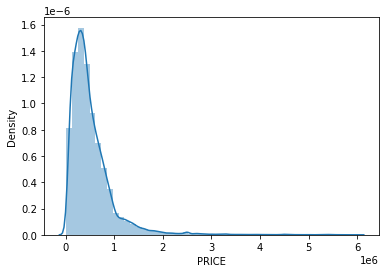

In [103]:
import seaborn as sns
raw_data_property['PRICE'].describe()
sns.distplot(raw_data_property['PRICE']);

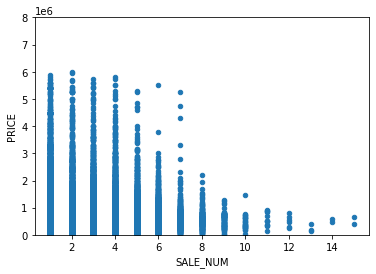

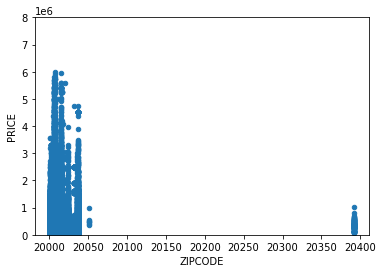

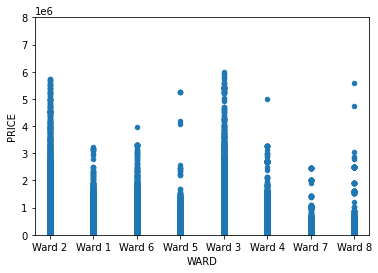

In [122]:
#观察
var = 'SALE_NUM'
data = pd.concat([raw_data_property['PRICE'], raw_data_property[var]], axis=1)
data.plot.scatter(x=var, y='PRICE', ylim=(0,8000000));

var = 'ZIPCODE'
data = pd.concat([raw_data_property['PRICE'], raw_data_property[var]], axis=1)
data.plot.scatter(x=var, y='PRICE', ylim=(0,8000000));

var = 'WARD'
data = pd.concat([raw_data_property['PRICE'], raw_data_property[var]], axis=1)
data.plot.scatter(x=var, y='PRICE', ylim=(0,8000000));

In [124]:
x=raw_data_property[['SALE_NUM','ZIPCODE']]
y=raw_data_property['PRICE']

In [127]:
import sklearn
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.2)

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
result_y=model.predict(x_test)
result_y

array([483214.35605196, 467242.87747549, 712400.77567318, ...,
       541907.39084491, 531925.21673461, 415335.57210194])

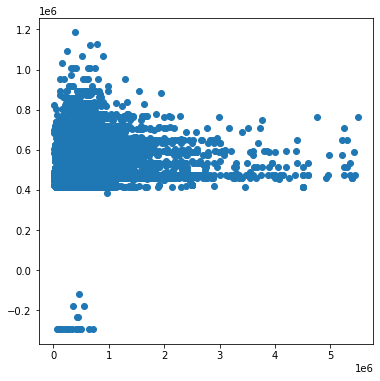

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test,result_y)
plt.show()

In [87]:
crime_data=pd.read_csv("raw_data_crime.csv")
m=raw_data.isnull().sum(axis=0)
print(m)

METHOD                     0
OFFENSE                    0
NEIGHBORHOOD_CLUSTER    5482
CENSUS_TRACT            1191
XBLOCK                     0
BLOCK                      0
YBLOCK                     0
DISTRICT                   0
WARD                       0
sector                     0
PSA                        0
LONGITUDE                  0
LATITUDE                   0
VOTING_PRECINCT            0
CCN                        0
OCTO_RECORD_ID             0
ANC                        0
BLOCK_GROUP             1191
YEAR                       0
START_DATE                 0
SHIFT                      0
REPORT_DAT                 0
dtype: int64


In [113]:
ward_invest_crime=pd.DataFrame(crime_data.groupby(['WARD'],as_index=False).size())
ward_invest_crime['WARD']=ward_invest_crime['WARD'].astype('int32')
ward_invest_crime

,WARD,size
0,1,63421
1,2,81717
2,3,24420
3,4,40801
4,5,61069
5,6,70696
6,7,55482
7,8,50812


In [115]:
lat_lon_invest_crime=pd.DataFrame(crime_data.groupby(['LATITUDE','LONGITUDE'],as_index=False).size())
lat_lon_invest_crime

,LATITUDE,LONGITUDE,size
0,38.813471,-77.013886,44
1,38.814659,-77.018112,105
2,38.814750,-77.013322,4
3,38.815912,-77.013956,13
4,38.817353,-77.014716,1
...,...,...,...
15833,38.993181,-77.039997,10
15834,38.993560,-77.038993,13
15835,38.993694,-77.042826,4
15836,38.994217,-77.041337,3


In [117]:
lat_lon_invest_property=pd.DataFrame(raw_data_property.groupby(['LATITUDE','LONGITUDE'],as_index=False).size())
lat_lon_invest_property

,LATITUDE,LONGITUDE,size
0,38.819731,-77.007197,1
1,38.819953,-77.005572,1
2,38.820060,-77.006961,1
3,38.820114,-77.006908,1
4,38.820206,-77.005567,1
...,...,...,...
58569,38.994710,-77.040790,1
58570,38.994751,-77.040121,1
58571,38.994797,-77.041378,1
58572,38.994894,-77.040309,1
